<a href="https://colab.research.google.com/github/vijayyevatkar/Shopify_Summer_2022_DS_Challenge/blob/main/Shopify_DS_Summer2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Shopify | Summer 2022 Data Science Intern Challenge 


### Question 1: Given some sample data, write a program to answer the following: [click here to access the required data set](https://https://docs.google.com/spreadsheets/d/16i38oonuX1y1g7C_UAmiK9GkY7cS-64DfiDMNiR41LM/edit#gid=0)

On Shopify, we have exactly 100 sneaker shops, and each of these shops sells only one model of shoe. We want to do some analysis of the average order value (AOV). When we look at orders data over a 30 day window, we naively calculate an AOV of $3145.13. Given that we know these shops are selling sneakers, a relatively affordable item, something seems wrong with our analysis. 

1. Think about what could be going wrong with our calculation. Think about a better way to evaluate this data. 
3. What metric would you report for this dataset?
4. What is its value?


### Solution 1

Without further ado, let's first get the dataset from the mentioned link and look at the dataset!

In [ ]:
import pandas as pd
sheet_url = "https://docs.google.com/spreadsheets/d/16i38oonuX1y1g7C_UAmiK9GkY7cS-64DfiDMNiR41LM/edit#gid=0"
url = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')

sneaker_df = pd.read_csv(url)
sneaker_df.head(10)

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11
5,6,58,882,138,1,credit_card,2017-03-14 15:25:01
6,7,87,915,149,1,cash,2017-03-01 21:37:57
7,8,22,761,292,2,cash,2017-03-08 2:05:38
8,9,64,914,266,2,debit,2017-03-17 20:56:50
9,10,52,788,146,1,credit_card,2017-03-30 21:08:26


It looks like we have the sale information of the 100 sneaker shops belonging to shopify. This data consists of the prices at which these sneakers were sold, the shop which sold it, the number of sneakers that were sold in a particular order and the payment method of the order along with the order timestamp.

Let's look at the `describe` command of pandas to get more insights on the statistics of the data. This might give us some information on why the Average Order Value (AOV) might be on the higher side.

In [ ]:
describe_df = sneaker_df.describe()
describe_df

,order_id,shop_id,user_id,order_amount,total_items
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000
mean,2500.500000,50.078800,849.092400,3145.128000,8.78720
std,1443.520003,29.006118,87.798982,41282.539349,116.32032
min,1.000000,1.000000,607.000000,90.000000,1.00000
25%,1250.750000,24.000000,775.000000,163.000000,1.00000
50%,2500.500000,50.000000,849.000000,284.000000,2.00000
75%,3750.250000,75.000000,925.000000,390.000000,3.00000
max,5000.000000,100.000000,999.000000,704000.000000,2000.00000


In [ ]:
# Get the mean of the order amount
order_mean = round(describe_df[["order_amount"]].loc["mean"][0], 2)
order_mean

3145.13

So, the naive calculation of AOV over the 30 day period seems to be just the `mean` of the `order_amount` over the 5000 orders when rounded to 2 digits. Let's just verify that the entire data is over 30 days.

In [ ]:
sneaker_df['created_at'] =  pd.to_datetime(sneaker_df['created_at'], format='%Y%m%d %H:%M:%S')
print(sneaker_df['created_at'].max() - sneaker_df['created_at'].min())

29 days 23:47:26


Perfect! The data is indeed distributed over 30 days and the **AOV** is calculated by just the `mean` of the `order_amount` which is a mistake.

Why is it a mistake?
Let's take another look at the dataset.

In [ ]:
sneaker_df.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 04:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 04:35:11


Do you notice it yet? Let's try to reorder the dataset a little.

In [ ]:
sneaker_df.sort_values(by=['order_amount', 'created_at'])

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2092,2093,92,986,90,1,debit,2017-03-04 06:44:05
1843,1844,92,987,90,1,debit,2017-03-06 07:01:09
322,323,92,783,90,1,debit,2017-03-08 03:49:15
3187,3188,92,854,90,1,credit_card,2017-03-08 18:16:25
...,...,...,...,...,...,...,...
3332,3333,42,607,704000,2000,credit_card,2017-03-24 04:00:00
4882,4883,42,607,704000,2000,credit_card,2017-03-25 04:00:00
2835,2836,42,607,704000,2000,credit_card,2017-03-28 04:00:00
2969,2970,42,607,704000,2000,credit_card,2017-03-28 04:00:00


**Q: Think about what could be going wrong with our calculation.**

As we can see, taking `mean` of `order_amount` directly is not the right way because each order is associated with multiple items belonging to the order. 

**Q: Think about a better way to evaluate this data.**

As each shop sells only one model of a sneaker, to get the actual AOV, we would need to divide sum of `order_amount` by the sum of `total_items`. This would give us the **actual AOV = $357.92**


In [ ]:
aov = round(sum(sneaker_df['order_amount']) / sum(sneaker_df['total_items']) , 2)
print(f"${aov}")

$357.92


**Q: What metric would you report for this dataset?**

We can come up with various metrics for the dataset so that shopify can have better understanding of the sneaker shops. While there are many of them, following are a few:
1. Which are the top customers buying sneakers?
2. Which payment method is most common while purchasing sneakers?
3. Which are the top shops making the sneaker sales? (Further mapping these shops with geography and drawing more insights)

In [ ]:
# For top customers buying sneakers
sneaker_df.groupby(by=["user_id"]).sum().sort_values(by = ["total_items"], ascending = False)[["total_items"]]

,total_items
user_id,
607,34000
718,58
787,57
745,56
847,54
...,...
939,15
750,15
719,15


We can see that the top customer is `user_id = 607` with a whopping 34000 sneakers bought in 1 month! Probably due for some rewards? 

Apart from this one customer, other users `[718, 787, 745, 847]` have bought on an average almost 2 sneakers per day over the month.

In [ ]:
# For most common payment method
sneaker_df.groupby(by=["payment_method"]).sum().sort_values(by = ["total_items"], ascending = False)[["total_items"]]

,total_items
payment_method,
credit_card,37415
debit,3391
cash,3130


We can see that the top `payment_method` without a doubt is `credit_card`. If shopify wants to promote alternate payment methods, some promotional offers on debit/cash can be given too!

In [ ]:
# For top shops making the sneaker sales
sneaker_df.groupby(by=["shop_id"]).sum().sort_values(by = ["order_amount"], ascending = False)[["order_amount", "total_items"]]

,order_amount,total_items
shop_id,,
42,11990176,34063
78,2263800,88
89,23128,118
81,22656,128
6,22627,121
...,...,...
2,9588,102
100,8547,77
56,8073,69


Kudos to `shop_id = 42` (Answer to life indeed?!) 

It made an ashtonishing monthly sale of $11,990,176 - Almost 12 million dollars and 34063 sneaker sales!!! The store manager has to be rewarded for this!! 

### Question 2: For this question you’ll need to use SQL. [Follow this link](https://www.w3schools.com/SQL/TRYSQL.ASP?FILENAME=TRYSQL_SELECT_ALL) to access the data set required for the challenge. Please use queries to answer the following questions. Paste your queries along with your final numerical answers below.

### Solution 2

1. How many orders were shipped by Speedy Express in total?


In [ ]:
# Please run the following queries here - https://www.w3schools.com/SQL/TRYSQL.ASP?FILENAME=TRYSQL_SELECT_ALL - to verify the results.
'''
SELECT Shipper.ShipperName, COUNT(*) AS Total_Orders
FROM Orders
INNER JOIN Shippers Shipper
	ON Orders.ShipperID = Shipper.ShipperId
WHERE Shipper.ShipperName = 'Speedy Express'
'''
# Result = 54

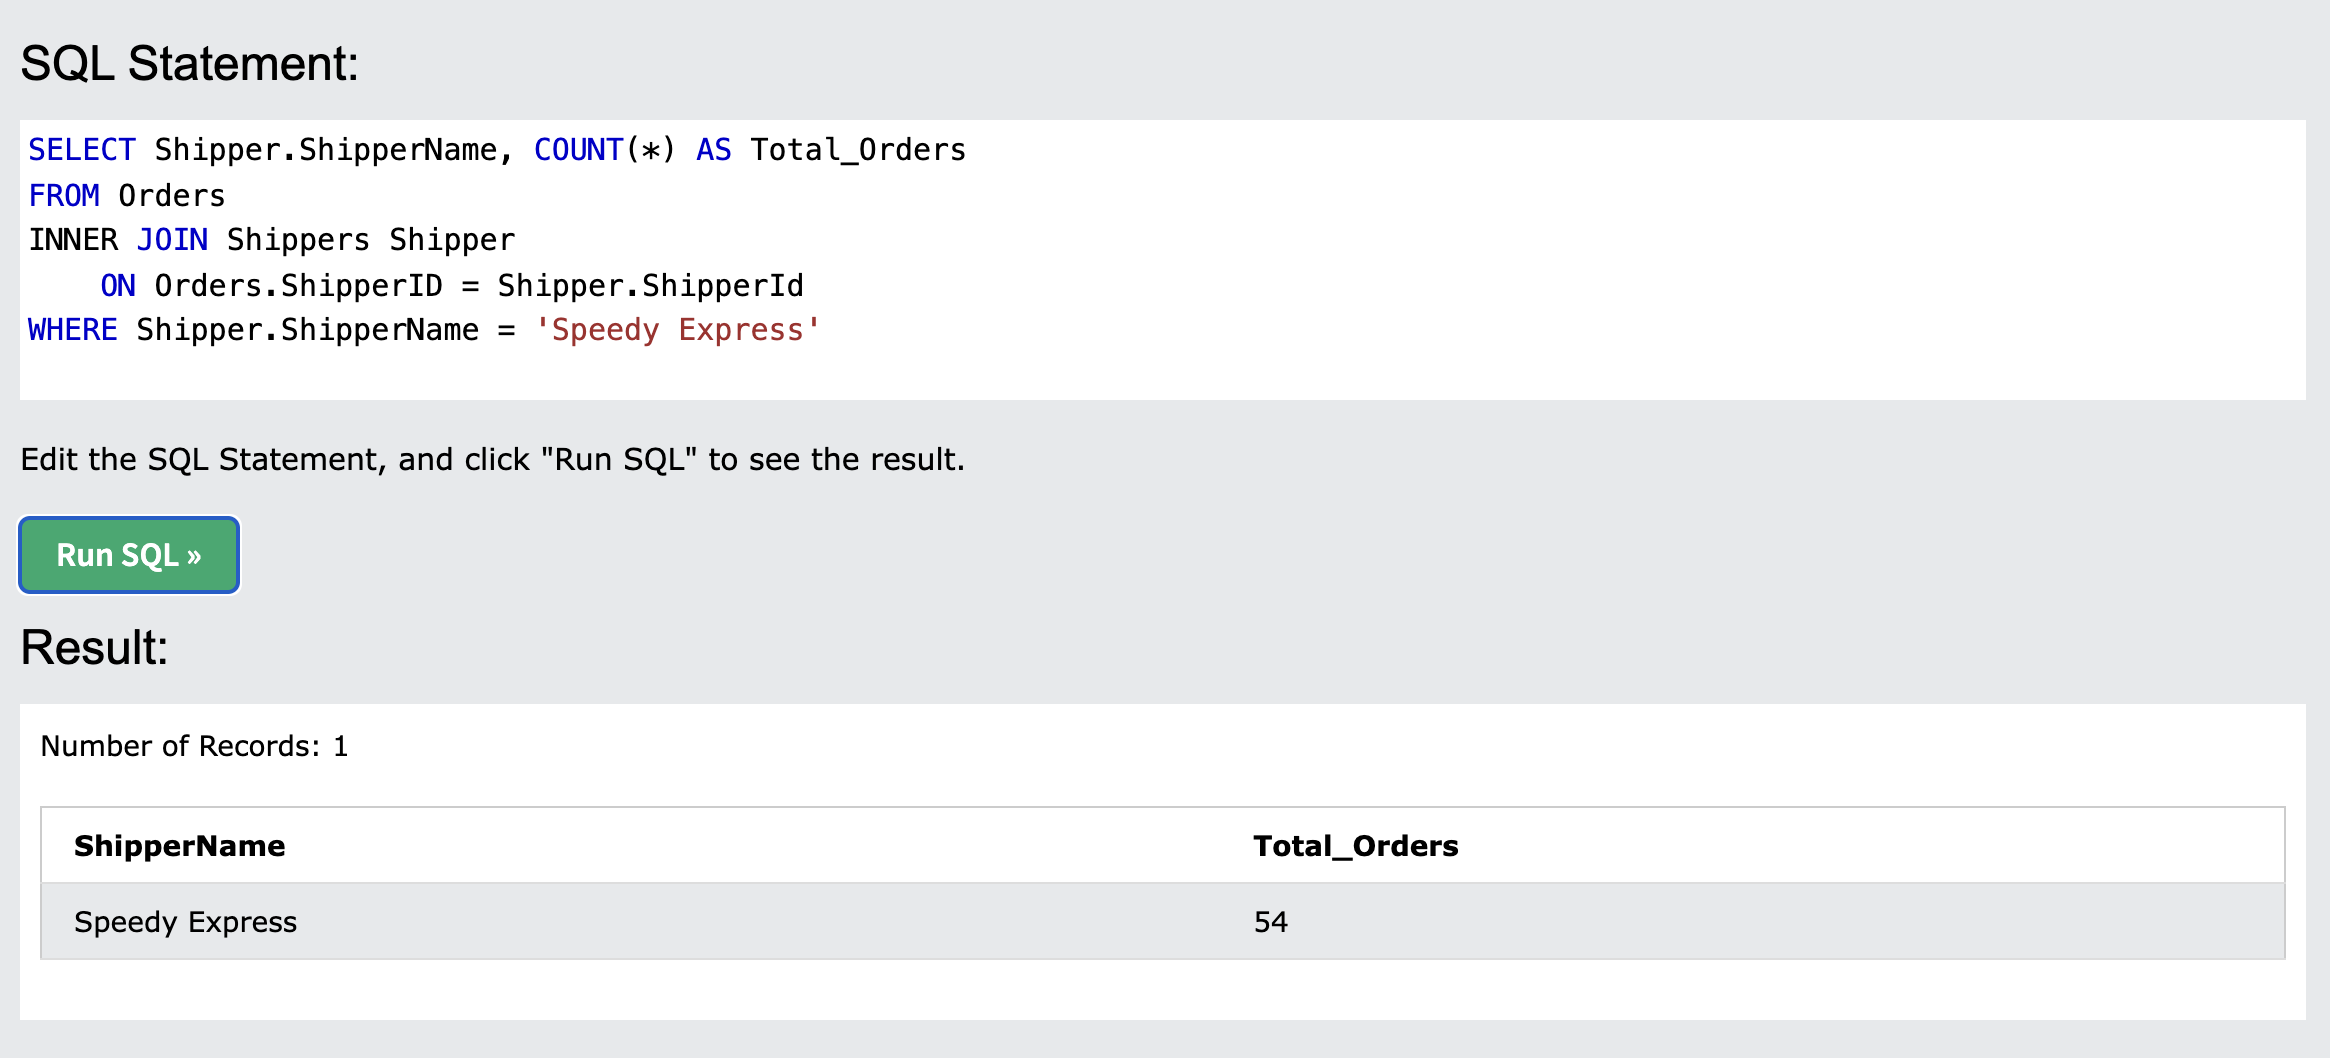

2. What is the last name of the employee with the most orders?

In [ ]:
# Please run the following queries here - https://www.w3schools.com/SQL/TRYSQL.ASP?FILENAME=TRYSQL_SELECT_ALL - to verify the results.
'''
SELECT LastName, TotalOrders FROM
(
  WITH EMPLOYEE_ORDERS AS 
      (SELECT ORDERS.EmployeeID, EMPLOYEES.LastName, ORDERS.OrderID
       FROM ORDERS
       JOIN EMPLOYEES ON EMPLOYEES.EmployeeID = ORDERS.EmployeeID
      )
  SELECT EMPLOYEE_ORDERS.EmployeeID, EMPLOYEE_ORDERS.LastName, COUNT(EMPLOYEE_ORDERS.OrderID) AS TotalOrders
  FROM EMPLOYEE_ORDERS
  GROUP BY EMPLOYEE_ORDERS.EmployeeID
  ORDER BY TotalOrders desc LIMIT 1
)
'''
# Result = Employee with LastName = "Peacock" has maximum orders = 40

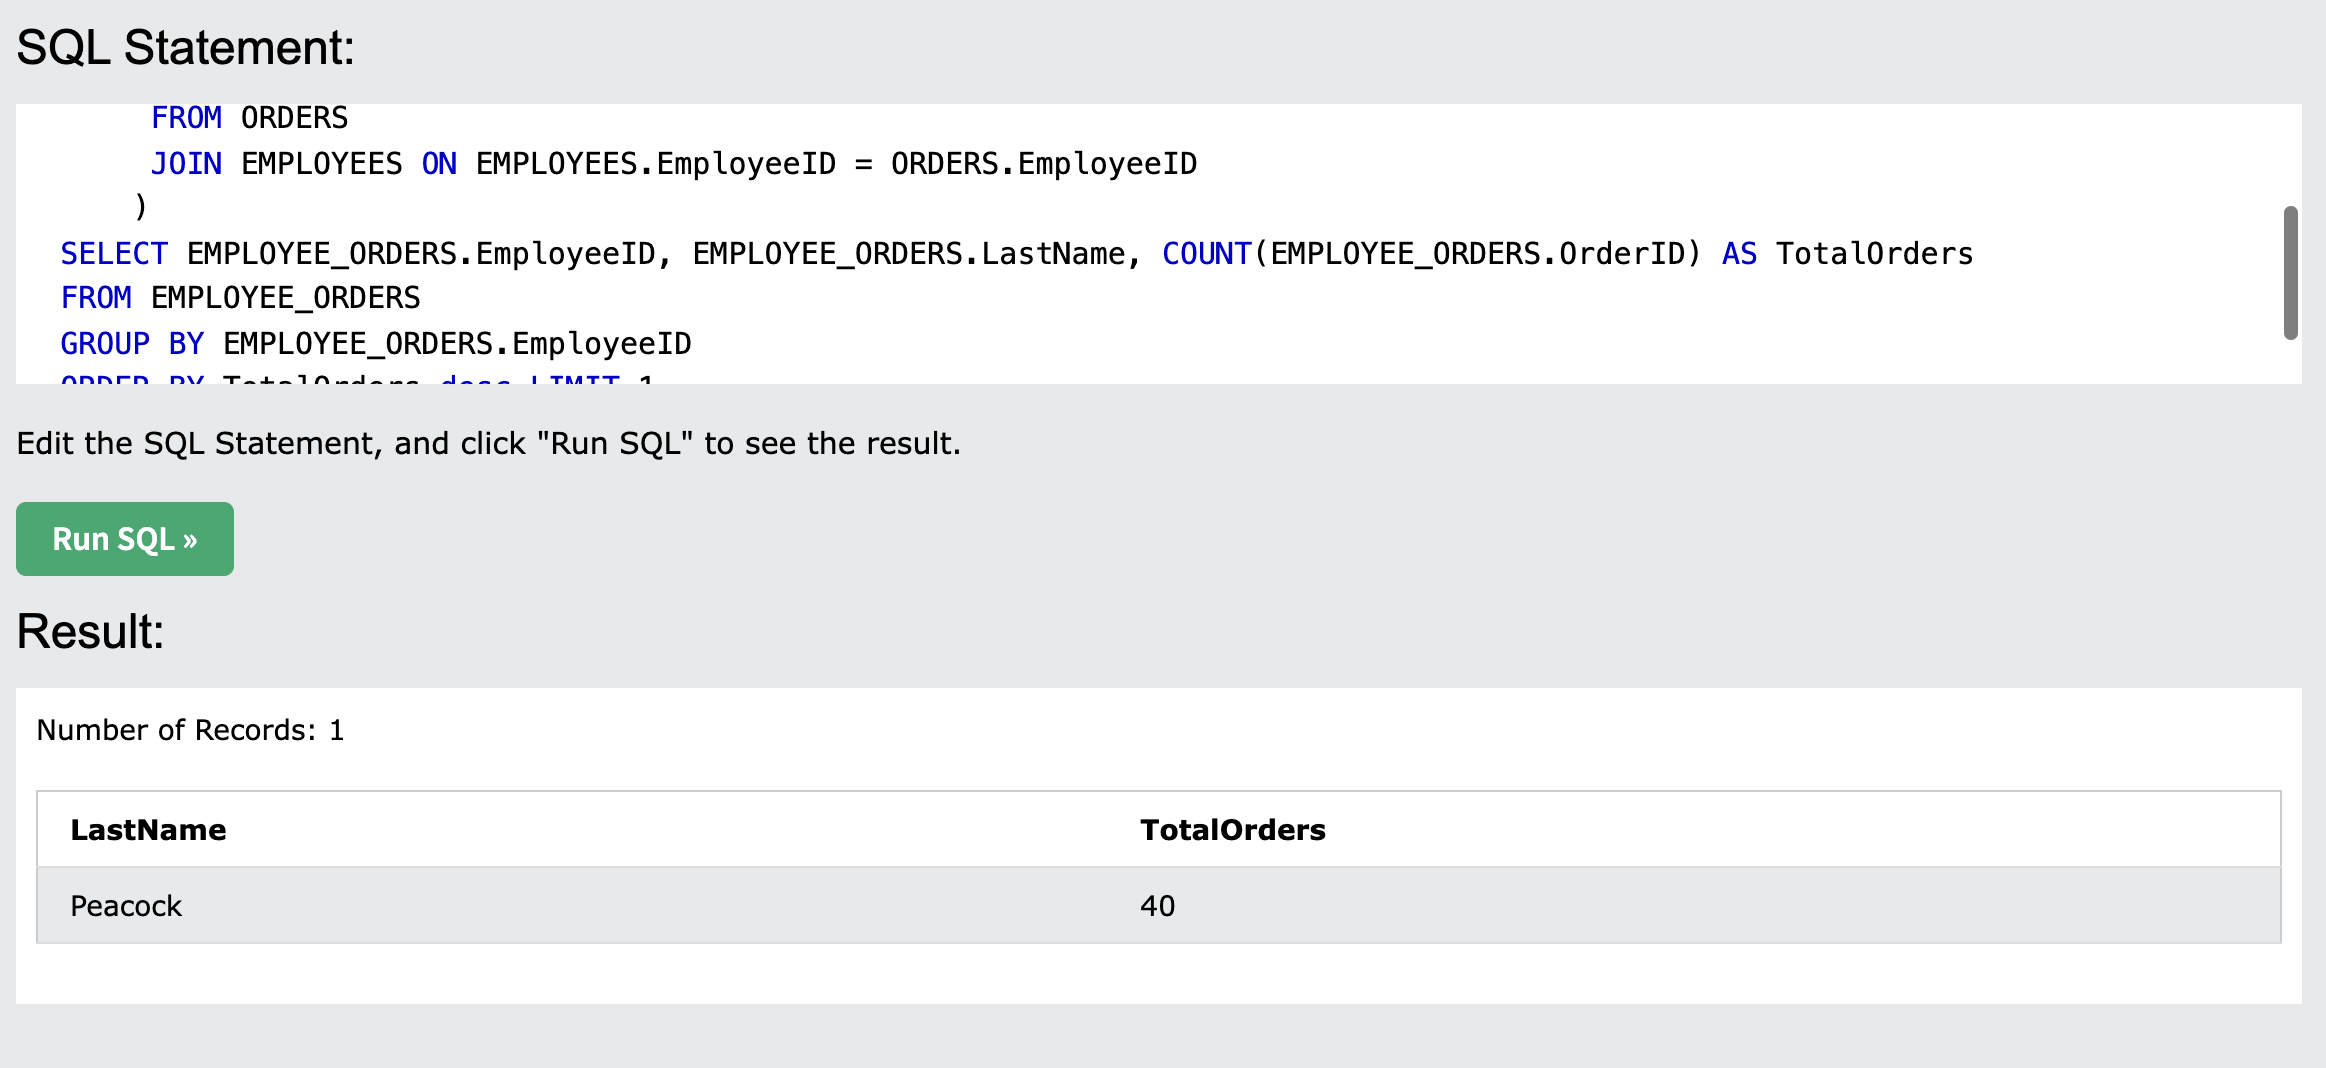

3. What product was ordered the most by customers in Germany?

In [ ]:
# Please run the following queries here - https://www.w3schools.com/SQL/TRYSQL.ASP?FILENAME=TRYSQL_SELECT_ALL - to verify the results.
'''
WITH GermanCustomers AS (SELECT CustomerID 
                         FROM Customers 
                         WHERE Country = 'Germany'
                        ),
TotalGermanyOrders AS (SELECT ProductID, SUM(Quantity) as Quantity
                        FROM Orders
                        INNER JOIN GermanCustomers
                        ON Orders.CustomerID = GermanCustomers.CustomerID
                        INNER JOIN OrderDetails
                        ON OrderDetails.OrderID = Orders.OrderID
                        GROUP BY ProductID
                      ),
HighestGermanyOrder AS (SELECT ProductID, MAX(Quantity) AS TotalQuantity FROM TotalGermanyOrders)

SELECT Products.ProductName, HighestGermanyOrder.TotalQuantity
FROM Products
INNER JOIN HighestGermanyOrder
ON HighestGermanyOrder.ProductID = Products.ProductID
'''
# Result: The product 'Boston Crab Meat' was ordered the most with a total of 160 orders in Germany.

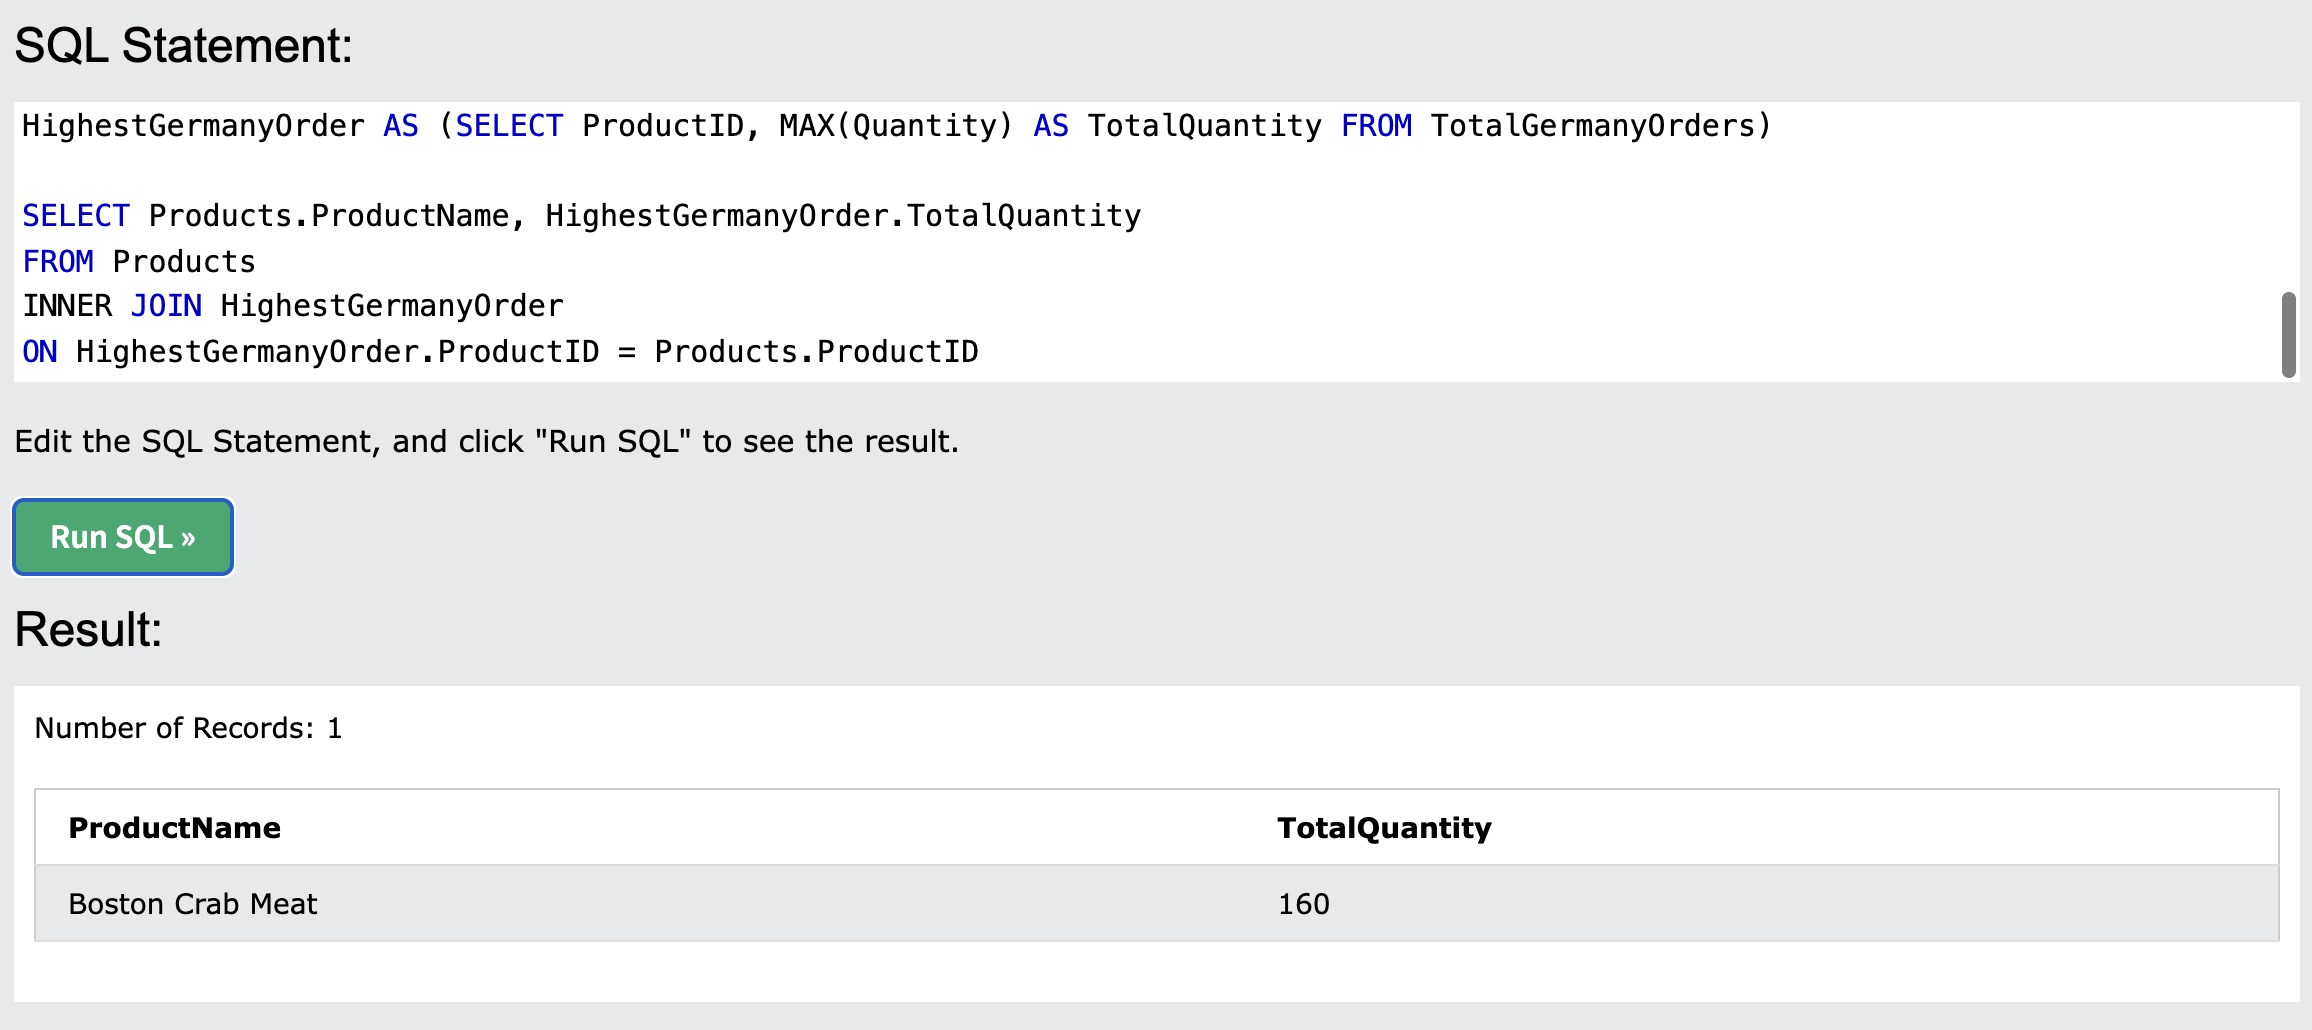